#Importing librarys#


In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Importing Data and some info#


In [34]:
creditcard=pd.read_csv('creditcard.csv')
print(creditcard.head())
print(creditcard.shape)
print(creditcard.describe())
print(creditcard.info())

#using some tools to take idea for data

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#Handilg Missing Vaues if Found#

In [35]:
missing_values = creditcard.isnull().sum()
missing_values[missing_values > 0]

,0
V14,1
V15,1
V16,1
V17,1
V18,1
V19,1
V20,1
V21,1
V22,1
V23,1


In [36]:
Continuous_Columns = [
  'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
           'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
           'V24', 'V25', 'V26', 'V27', 'V28']
Carde_imputed = SimpleImputer(missing_values=np.nan, strategy="mean")

creditcard[Continuous_Columns]= Carde_imputed.fit_transform(creditcard[Continuous_Columns])
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0


In [37]:
missing_values = creditcard.isnull().sum()
missing_values[missing_values > 0]

,0
Amount,1
Class,1


#Classes Info#

In [38]:
class_counts= creditcard['Class'].value_counts()
print(class_counts)

Class
0.0    1983
1.0       2
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Transaction Classes')

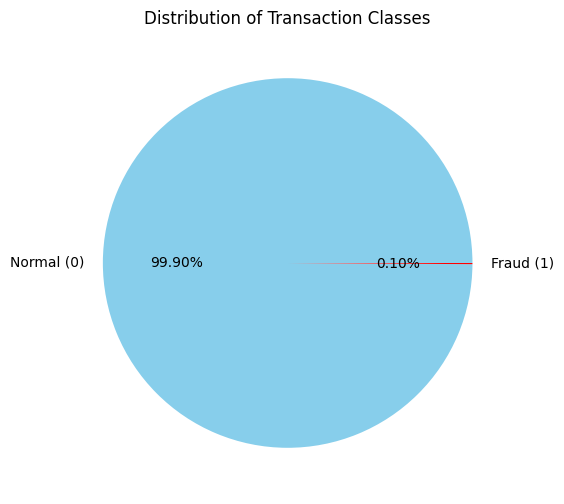

In [39]:
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Normal (0)', 'Fraud (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'])
plt.title('Distribution of Transaction Classes')

In [40]:
# frome counting the classes we can show the data has two classes the data is not balance we support this with pie plot

#Ploting pefore and after scaling#



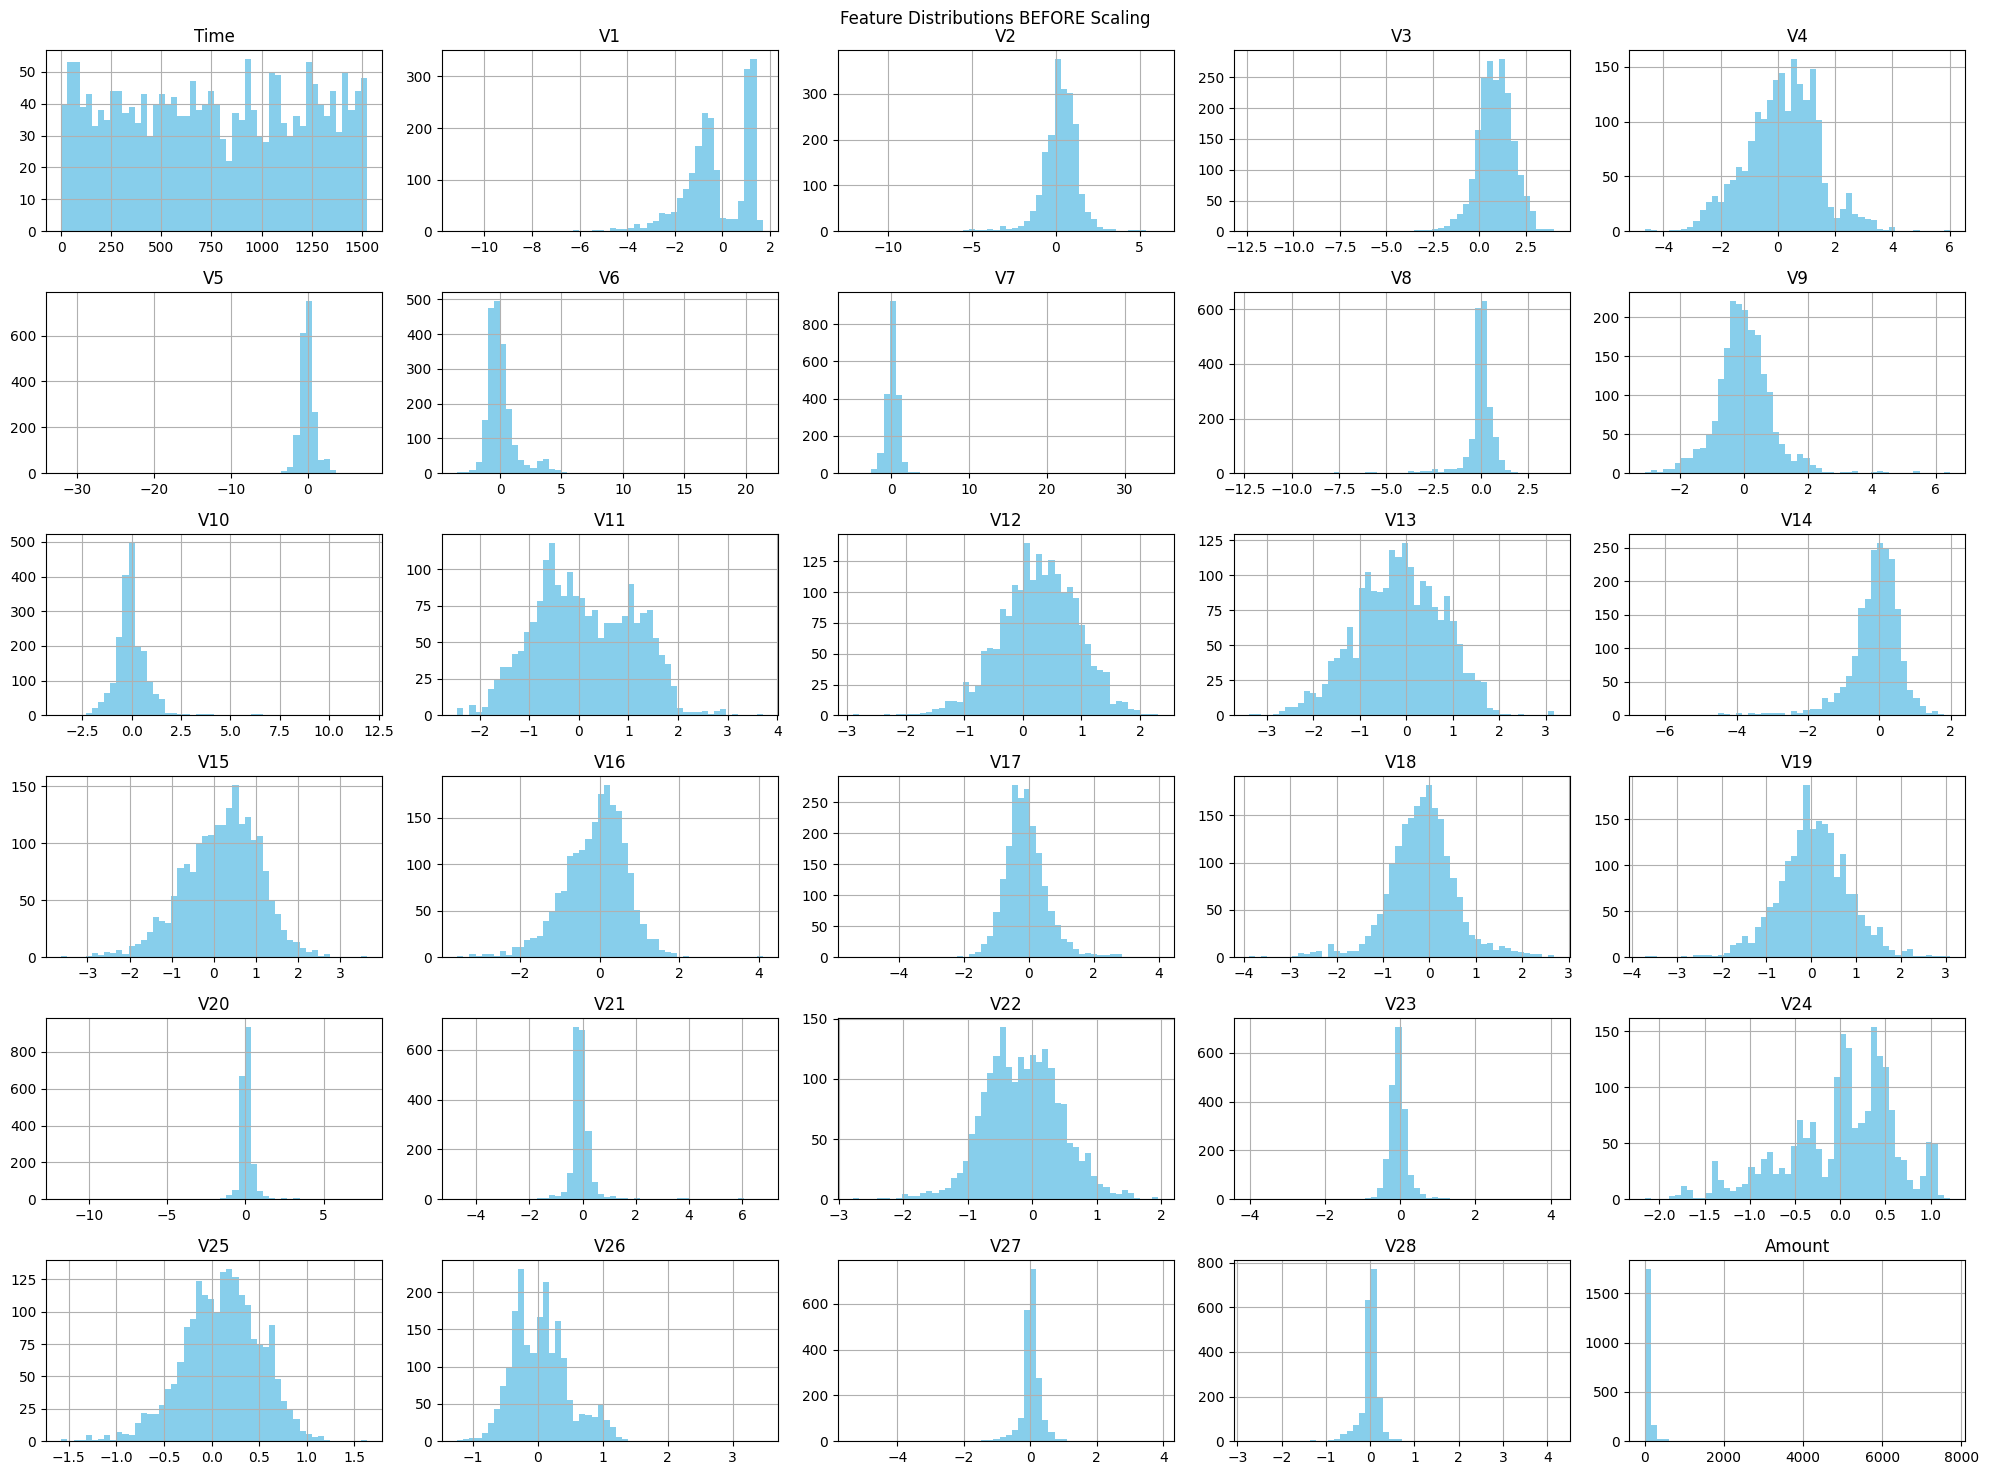

In [41]:
features = [col for col in creditcard.columns if col != 'Class']
creditcard[features].hist(bins=50, figsize=(20,15), color='skyblue')
plt.suptitle("Feature Distributions BEFORE Scaling")
plt.tight_layout()

#plot to show data befor scaling

In [42]:
Carde = creditcard.drop(columns=['Class'])
scaler = StandardScaler()
Carde_scaled = scaler.fit_transform(Carde)

#we drop column of class because if apply scaling on class the class it will be ruined
#we apply scale to all data without class we chose StandardScaler not MinMaxScaler  becuas
#It gives more accurate results in PCA and K-Means.
#It scales all features to the same variance scale, without distorting the distribution.

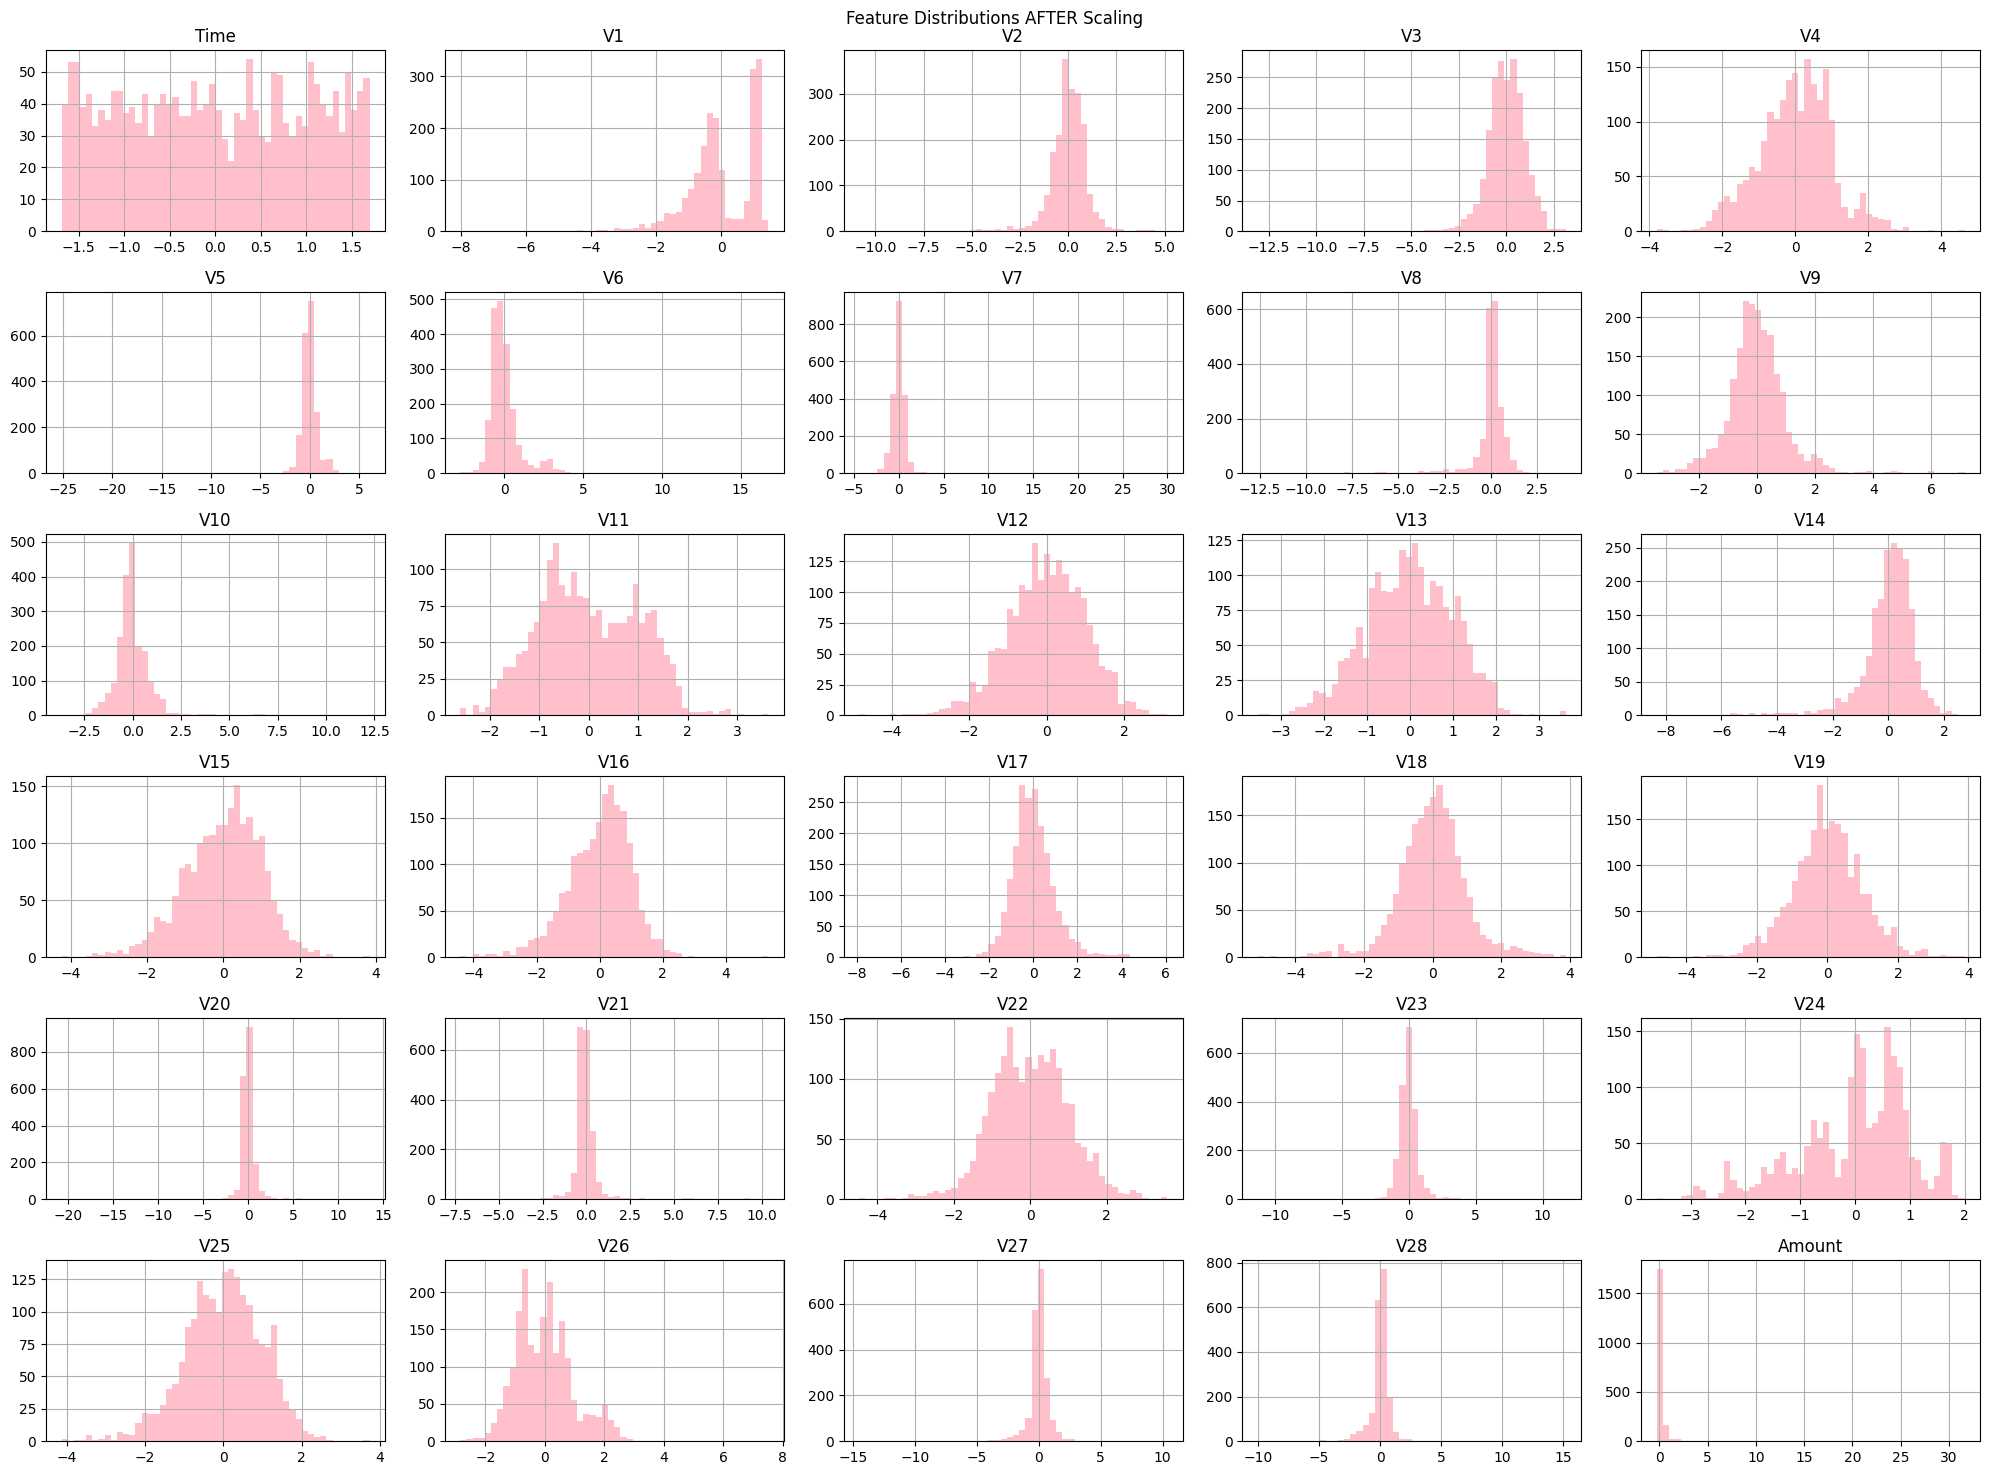

In [43]:
Carde_scaled_df = pd.DataFrame(Carde_scaled, columns=Carde.columns)
Carde_scaled_df.hist(bins=50, figsize=(20,15), color='pink')
plt.suptitle("Feature Distributions AFTER Scaling")
plt.tight_layout()

#plot to show data after scaling

In [44]:
pca = PCA()
Card_pca = pca.fit_transform(creditcard[Continuous_Columns])
Card_pca.shape

(1986, 24)